In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import QuantileTransformer,RobustScaler

In [4]:
dfh =pd.read_csv('E:/DS/data/siam/bi/hq_markup_train.csv')

In [8]:
dfh.columns

Index(['file_name', 'department_name', 'user_name', 'Некачественное ГДИС',
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом', 'Влияние ствола скважины_details',
       'Радиальный режим_details', 'Линейный режим_details',
       'Билинейный режим_details', 'Сферический режим_details',
       'Граница постоянного давления_details',
       'Граница непроницаемый разлом_details'],
      dtype='object')

In [3]:
df = pd.read_csv('E:/DS/data/siam/bi/markup_train.csv')

In [10]:
df

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,2b1db5db-a184-4223-ac58-2f7a416dbab8,department1,user1,0,1,0,0,1,0,0,0,2.346340,NaN,NaN,0.494178,NaN,NaN,NaN
1,680641f4-eaae-4dca-9338-d9285efbda88,department2,user1,1,0,0,1,1,0,0,0,NaN,NaN,1.517418,0.659840,NaN,NaN,NaN
2,01fe0501-8f06-4d23-9754-05744ae95a4c,department2,user1,0,1,0,0,0,0,0,0,0.356844,NaN,NaN,NaN,NaN,NaN,NaN
3,4ad441ba-50ab-4520-8296-173907044b88,department1,user1,0,1,1,0,0,0,0,0,0.059301,1.344549,NaN,NaN,NaN,NaN,NaN
4,488841e5-cee6-4807-81a0-cb4111777b0b,department2,user1,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,40efd674-ad49-4d43-ab06-7e23f61bf27f,department5,user14,0,1,1,0,0,0,0,0,1.149702,1.142090,NaN,NaN,NaN,NaN,NaN
45137,dcdc9a79-5b7f-4cc7-ac9b-cb90e7e73aeb,department5,user14,0,1,0,0,0,0,0,0,4.855800,NaN,NaN,NaN,NaN,NaN,NaN
45138,7b895820-834b-428f-99d6-1995531eb999,department5,user14,0,1,0,0,0,0,0,0,5.263520,NaN,NaN,NaN,NaN,NaN,NaN
45139,f8b981e9-d4c1-4180-b63e-41bf2b972166,department5,user14,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pd.read_csv('E:/DS/data/siam/bi/test/846291a2-6475-47ac-8f10-08eac6b93fcb', sep='\t', names=['time', 'atm','der_atm'])

,time,atm,der_atm


In [16]:
import random

def generate_binary_with_probability(p):
    """
    Generate 0 or 1 with probability p for 1 and (1-p) for 0.

    Args:
        p (float): Probability of generating a 1 (must be between 0 and 1).

    Returns:
        int: 1 with probability p, otherwise 0.
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")
    
    return 1 if random.random() < p else 0

In [17]:
import os
import pandas as pd

def combine_csv_files_to_dataframe(folder_path):
    """
    Reads all CSV files from the specified folder, combines them into a single DataFrame,
    and adds a 'file_name' column indicating the source file for each row.

    Args:
        folder_path (str): Path to the folder containing the CSV files.

    Returns:
        pd.DataFrame: A DataFrame with columns ['file_name', 'time', 'atm', 'der_atm'].
    """
    # Initialize an empty list to store DataFrames
    dataframes = []

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Check if the current item is a file and ends with .csv
        if os.path.isfile(file_path):
            try:
                # Read the CSV file without a header and with tab as the separator
                df = pd.read_csv(file_path, sep='\t', header=None)

                # Ensure the file has exactly 3 columns (time, atm, der_atm)
                if df.shape[1] != 3:
                    print(f"Skipping file {file_name}: Expected 3 columns but found {df.shape[1]}.")
                    continue

                # Assign column names to the DataFrame
                df.columns = ['time', 'atm', 'der_atm']

                # Add a new column for the file name
                df['file_name'] = file_name

                # Reorder columns to match the desired output format
                df = df[['file_name', 'time', 'atm', 'der_atm']]

                # Append the processed DataFrame to the list
                dataframes.append(df)

            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    # Concatenate all DataFrames into a single DataFrame
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        print("No valid CSV files found or all files failed to process.")
        return pd.DataFrame(columns=['file_name', 'time', 'atm', 'der_atm'])

# Example usage:
# folder_path = r"C:\path\to\your\folder"
# result_df = combine_csv_files_to_dataframe(folder_path)
# print(result_df)

In [18]:
test =combine_csv_files_to_dataframe('E:/DS/data/siam/bi/test/')

Error processing file 846291a2-6475-47ac-8f10-08eac6b93fcb: No columns to parse from file


In [19]:
test.file_name.nunique()

499

In [ ]:
test

In [ ]:
846291a2-6475-47ac-8f10-08eac6b93fcb

In [29]:
test

,file_name,time,atm,der_atm
0,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.155730,3.762312,5.678179
1,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.189730,4.508152,4.686962
2,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.222730,5.804305,5.854821
3,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.255730,6.138593,6.969295
4,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.289730,7.318060,7.049870
...,...,...,...,...
79036,ffcab4d7-cffa-458e-b244-a51beb5c01d4,113.303287,27.559423,1.400212
79037,ffcab4d7-cffa-458e-b244-a51beb5c01d4,127.128379,27.718240,1.400137
79038,ffcab4d7-cffa-458e-b244-a51beb5c01d4,142.640387,27.876763,1.400071
79039,ffcab4d7-cffa-458e-b244-a51beb5c01d4,160.045147,28.034959,1.400011


In [47]:
test.der_atm.median()

np.float64(6.169643226590422)

In [46]:
test

,file_name,time,atm,der_atm
0,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.155730,3.762312,5.678179
1,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.189730,4.508152,4.686962
2,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.222730,5.804305,5.854821
3,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.255730,6.138593,6.969295
4,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,0.289730,7.318060,7.049870
...,...,...,...,...
79036,ffcab4d7-cffa-458e-b244-a51beb5c01d4,113.303287,27.559423,1.400212
79037,ffcab4d7-cffa-458e-b244-a51beb5c01d4,127.128379,27.718240,1.400137
79038,ffcab4d7-cffa-458e-b244-a51beb5c01d4,142.640387,27.876763,1.400071
79039,ffcab4d7-cffa-458e-b244-a51beb5c01d4,160.045147,28.034959,1.400011


In [33]:
test[:1].to_dict()

{'file_name': {0: '00950953-2e3b-4e38-91cb-5bbdd5dbda0e'},
 'time': {0: 0.1557295548209368},
 'atm': {0: 3.7623123615748737},
 'der_atm': {0: 5.678178606676401}}

In [48]:
pd.DataFrame({'file_name': {0: '00950953-2e3b-4e38-91cb-5bbdd5dbda0e'},
 'time': {0: 96.9374591655535},
 'atm': {0: 35.5767},
 'der_atm': {0: 6.169643}})

,file_name,time,atm,der_atm
0,00950953-2e3b-4e38-91cb-5bbdd5dbda0e,96.937459,35.5767,6.169643


In [20]:
tets =pd.concat([test,pd.DataFrame({'file_name': {0: '846291a2-6475-47ac-8f10-08eac6b93fcb'},
 'time': {0: 96.9374591655535},
 'atm': {0: 35.5767},
 'der_atm': {0: 6.169643}})], ignore_index=True)

In [70]:
tets.to_parquet('E:/DS/data/siam/bi/test_meas.parquet', index=False)

In [23]:
test = pd.read_parquet('E:/DS/data/siam/bi/test_meas.parquet')

In [24]:
test.nunique()

file_name      500
time         61243
atm          73445
der_atm      79042
dtype: int64

In [55]:
train =combine_csv_files_to_dataframe('E:/DS/data/siam/bi/train/')

Error processing file 0011f375-c95b-4d33-b49d-1325a1e8508e: No columns to parse from file
Error processing file 00639e6a-53e4-4c1b-b42d-c0b617a7c98a: No columns to parse from file
Error processing file 027afe36-a4f6-40ec-a6c7-feb778b2b79a: No columns to parse from file
Error processing file 029df411-2bc1-40f1-bf2a-d9660c834be4: No columns to parse from file
Error processing file 0304f05d-1436-4c43-a5f4-7f443112876d: No columns to parse from file
Error processing file 0343c2cb-a18a-4de1-a21b-582c427d38c8: No columns to parse from file
Error processing file 03c7c2da-255c-4fa4-a469-f2c761d92f77: No columns to parse from file
Error processing file 041b8e87-dbe9-43bc-822f-ef64f16b23bc: No columns to parse from file
Error processing file 0488b180-53bc-4597-a007-7da4c545c892: No columns to parse from file
Error processing file 052b0784-ff79-4b5f-b1e2-962d47548cec: No columns to parse from file
Error processing file 0531f3c7-dee7-4d51-add9-9cbd40aaf1c9: No columns to parse from file
Error proc

In [56]:
train.shape

(8450441, 4)

In [57]:
train.file_name.nunique()

44884

In [59]:
np.intersect1d(train.file_name.unique(), df.file_name).shape

(44884,)

In [61]:
train.to_parquet('E:/DS/data/siam/bi/train_meas.parquet', index=False)

In [63]:
train.describe()

,time,atm,der_atm
count,8.450441e+06,8.450441e+06,8.450441e+06
mean,1.047770e+02,1.098540e+26,1.538377e+25
std,1.808388e+03,1.807080e+28,3.163190e+27
min,-5.561043e+02,2.564978e-07,5.039755e-13
25%,9.083333e-01,1.212516e+01,2.378869e+00
50%,7.300000e+00,3.823546e+01,7.674377e+00
75%,4.397556e+01,1.126213e+02,2.418925e+01
max,8.429354e+05,4.647122e+30,1.324309e+30


In [64]:
test.describe()

,time,atm,der_atm
count,79041.000000,7.904100e+04,7.904100e+04
mean,96.937459,1.252809e+04,2.306368e+03
std,354.705958,1.000609e+05,2.791549e+04
min,0.000011,3.234952e-04,8.626791e-05
25%,1.463322,1.081356e+01,1.958336e+00
50%,11.747500,3.557673e+01,6.169643e+00
75%,64.338737,8.673015e+01,1.797886e+01
max,9796.000000,2.160217e+06,1.093242e+06


In [66]:
df.describe()

,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,45141.000000,45141.000000,45141.000000,45141.000000,45141.000000,45141.000000,45141.000000,45141.000000,35558.000000,25855.000000,12211.000000,12086.000000,5764.000000,4874.000000,4265.000000
mean,0.160984,0.787710,0.572761,0.270508,0.267739,0.127689,0.107973,0.094482,1.719234,1.140486,0.605509,0.934330,1.292040,144.019966,160.928583
std,0.367521,0.408934,0.494683,0.444227,0.442786,0.333747,0.310349,0.292501,1.537100,1.155191,1.012616,1.166539,0.982978,782.593841,339.370082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.843521,-3.707246,-4.109357,-3.332898,-5.164659,0.006653,0.010753
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.914535,0.504870,0.028459,0.327374,0.743594,18.335495,29.301152
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.589366,0.959171,0.516372,0.720093,1.296814,55.182021,75.822331
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.256645,1.422883,1.024682,1.130444,1.808614,134.488126,182.395620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.777765,6.408605,29.027806,29.129381,6.631359,51035.492870,11595.502940


In [71]:
train

,file_name,time,atm,der_atm
0,000092d4-c259-42b7-9d79-f0332283a7d9,0.001331,0.633378,0.212376
1,000092d4-c259-42b7-9d79-f0332283a7d9,0.021331,1.222567,0.706206
2,000092d4-c259-42b7-9d79-f0332283a7d9,0.041331,1.767567,1.363384
3,000092d4-c259-42b7-9d79-f0332283a7d9,0.051331,2.253648,1.427239
4,000092d4-c259-42b7-9d79-f0332283a7d9,0.071331,2.754459,2.023955
...,...,...,...,...
8450436,fffe833f-9519-44b5-9c8f-696dc60c6001,227.290560,33.193822,0.670930
8450437,fffe833f-9519-44b5-9c8f-696dc60c6001,232.531949,33.212376,0.674797
8450438,fffe833f-9519-44b5-9c8f-696dc60c6001,237.894171,33.225070,0.688133
8450439,fffe833f-9519-44b5-9c8f-696dc60c6001,243.380005,33.241344,0.682683


In [81]:
train.time.quantile(.999)

np.float64(10743.166809874752)

In [84]:
train[train.time<train.time.quantile(.999)].file_name.value_counts().describe()

count    44884.000000
mean       188.084618
std        155.966386
min          1.000000
25%         85.000000
50%        164.000000
75%        267.000000
max       3378.000000
Name: count, dtype: float64

In [80]:
test[test.time>train.time.quantile(.999)].file_name.nunique()

0

In [86]:
df.columns

Index(['file_name', 'department_name', 'user_name', 'Некачественное ГДИС',
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом', 'Влияние ствола скважины_details',
       'Радиальный режим_details', 'Линейный режим_details',
       'Билинейный режим_details', 'Сферический режим_details',
       'Граница постоянного давления_details',
       'Граница непроницаемый разлом_details'],
      dtype='object')

In [88]:
df['Влияние ствола скважины_details'].quantile(0.99)

np.float64(6.82399412158)

In [92]:
stats=df.describe()

In [90]:
columns_b=['Некачественное ГДИС',
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом', ]
columns_r=['Влияние ствола скважины_details',
       'Радиальный режим_details', 'Линейный режим_details',
       'Билинейный режим_details', 'Сферический режим_details',
       'Граница постоянного давления_details',
       'Граница непроницаемый разлом_details']

In [93]:
stats[columns_r]

,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,35558.000000,25855.000000,12211.000000,12086.000000,5764.000000,4874.000000,4265.000000
mean,1.719234,1.140486,0.605509,0.934330,1.292040,144.019966,160.928583
std,1.537100,1.155191,1.012616,1.166539,0.982978,782.593841,339.370082
min,-3.843521,-3.707246,-4.109357,-3.332898,-5.164659,0.006653,0.010753
25%,0.914535,0.504870,0.028459,0.327374,0.743594,18.335495,29.301152
50%,1.589366,0.959171,0.516372,0.720093,1.296814,55.182021,75.822331
75%,2.256645,1.422883,1.024682,1.130444,1.808614,134.488126,182.395620
max,31.777765,6.408605,29.027806,29.129381,6.631359,51035.492870,11595.502940


In [94]:
df['Граница постоянного давления_details'].quantile(.99)

np.float64(1232.8740002499997)

In [100]:
test.time.describe()

count    79041.000000
mean        96.937459
std        354.705958
min          0.000011
25%          1.463322
50%         11.747500
75%         64.338737
max       9796.000000
Name: time, dtype: float64

In [106]:
train.file_name.value_counts().quantile(.995)

np.float64(1018.0)

In [108]:
test.columns

Index(['file_name', 'time', 'atm', 'der_atm'], dtype='object')

# prep debug data

In [150]:
from sklearn.preprocessing import QuantileTransformer,RobustScaler

In [151]:
scaler = RobustScaler()
qt = QuantileTransformer(output_distribution='uniform')  # or 'normal'

In [ ]:
qt = QuantileTransformer(output_distribution='uniform')
qt.fit_transform()

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)  # Fit on training data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform')  # or 'normal'
qt.fit(X_train)  # Fit on training data
X_train_transformed = qt.transform(X_train)
X_val_transformed = qt.transform(X_val)


In [109]:
deb1000 = df.sample(1000)


In [117]:
deb1000_dt = train[train.file_name.isin(deb1000.file_name)]

In [115]:
deb1000.to_csv('E:/DS/data/siam/deb/tg.csv', index=False)

In [ ]:
df[columns].applymap(lambda x: abs(x) if x < 0 else x)

In [118]:
deb1000_dt.to_parquet('E:/DS/data/siam/deb/data.parquet',index=False)

In [186]:
df[columns_r[0]].quantile(0.95)

np.float64(5.495232335200002)

In [182]:
df[columns_r].describe()

,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,35558.000000,25855.000000,12211.000000,12086.000000,5764.000000,4874.000000,4265.000000
mean,1.719234,1.140486,0.605509,0.934330,1.292040,144.019966,160.928583
std,1.537100,1.155191,1.012616,1.166539,0.982978,782.593841,339.370082
min,-3.843521,-3.707246,-4.109357,-3.332898,-5.164659,0.006653,0.010753
25%,0.914535,0.504870,0.028459,0.327374,0.743594,18.335495,29.301152
50%,1.589366,0.959171,0.516372,0.720093,1.296814,55.182021,75.822331
75%,2.256645,1.422883,1.024682,1.130444,1.808614,134.488126,182.395620
max,31.777765,6.408605,29.027806,29.129381,6.631359,51035.492870,11595.502940


In [121]:
deb1000.describe()

,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,812.000000,561.000000,259.000000,243.000000,137.000000,114.000000,103.000000
mean,0.170000,0.812000,0.561000,0.259000,0.24300,0.137000,0.11400,0.103000,1.646013,1.084292,0.622219,0.954300,1.229852,180.058273,169.525634
std,0.375821,0.390908,0.496513,0.438305,0.42911,0.344019,0.31797,0.304111,1.486583,1.103846,1.016137,1.170772,0.973174,378.564011,371.431896
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,-2.983536,-1.373433,-2.326282,-1.181445,-1.784680,0.006653,0.010753
25%,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.871630,0.452691,0.050585,0.270330,0.736894,25.593249,27.531214
50%,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.578852,0.874280,0.534388,0.755408,1.172949,64.432324,65.973618
75%,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.00000,0.000000,2.189293,1.373002,1.014941,1.111813,1.701250,157.958099,130.632219
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,8.081612,5.353098,5.535677,5.525789,6.316606,2541.716609,3175.392526


In [198]:
ch2 = deb1000[[columns_r[-1]]].dropna().copy()

In [199]:
scaler = RobustScaler()
#scaler.fit_transform(ch2)
qt = QuantileTransformer(output_distribution='uniform')
n = scaler.fit_transform(ch2)
n2 = qt.fit_transform(ch2)
ch2['n']=n
ch2['n2']=n2

C:\Users\vorsi\miniconda3\envs\and_kar_c\lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (103). n_quantiles is set to n_samples.
  warnings.warn(


In [201]:
qt.inverse_transform([[0.362745]])

C:\Users\vorsi\miniconda3\envs\and_kar_c\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


array([[43.22813519]])

In [200]:
ch2

,Граница непроницаемый разлом_details,n,n2
34540,43.228144,-0.220613,0.362745
14497,131.458364,0.635151,0.754902
13367,27.832009,-0.369944,0.254902
1572,13.899998,-0.505074,0.166667
24080,105.591853,0.384266,0.676471
...,...,...,...
7337,123.034945,0.553451,0.725490
25255,24.232409,-0.404857,0.205882
16955,203.778143,1.336597,0.833333
35926,4.040064,-0.600708,0.049020


<Axes: >

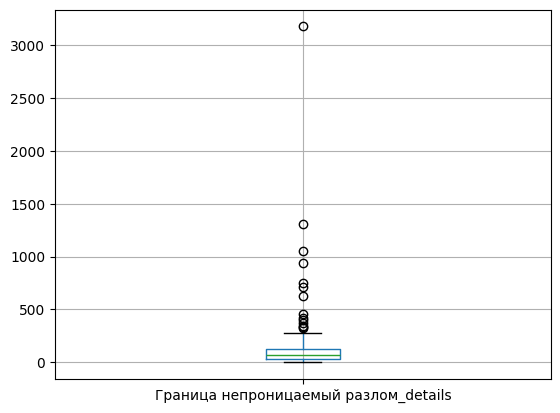

In [203]:
ch2[['Граница непроницаемый разлом_details'
]].boxplot()

<Axes: >

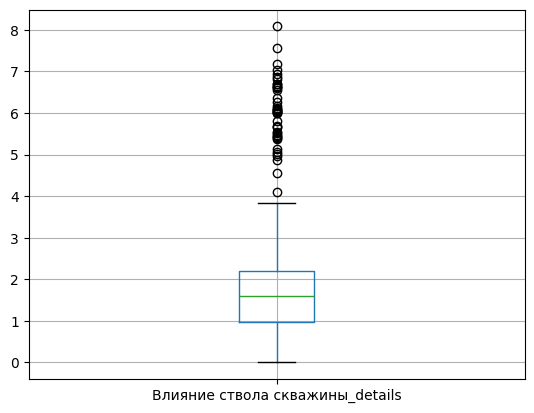

In [165]:
deb1000[[columns_r[0]]].dropna().abs().boxplot()

In [135]:
deb1000_dt.shape

(183099, 4)

In [143]:
deb1000_dt_l1p = deb1000_dt.copy()

In [144]:
deb1000_dt_l1p[['time', 'atm', 'der_atm']] = np.log1p(deb1000_dt_l1p[['time', 'atm', 'der_atm']])

In [145]:
deb1000_dt_l1p.to_parquet('E:/DS/data/siam/deb/data_l1p.parquet',index=False)

In [140]:
deb1000_dt.set_index('file_name').

,time,atm,der_atm
file_name,,,
0017eab1-b5e6-4319-b4d3-38269682937c,0.036111,0.196027,1.002750
0017eab1-b5e6-4319-b4d3-38269682937c,0.051389,0.549833,2.199478
0017eab1-b5e6-4319-b4d3-38269682937c,0.089167,2.792194,6.532038
0017eab1-b5e6-4319-b4d3-38269682937c,0.111389,4.467192,9.527812
0017eab1-b5e6-4319-b4d3-38269682937c,0.191944,12.316253,20.059409
...,...,...,...
ffd886a9-629d-4b44-846d-6fb309d3c943,15.207347,126.848614,1495.512756
ffd886a9-629d-4b44-846d-6fb309d3c943,15.561547,129.003147,1550.852932
ffd886a9-629d-4b44-846d-6fb309d3c943,15.924047,131.341145,1639.679564


In [139]:
np.log1p(deb1000_dt.set_index('file_name'))

,time,atm,der_atm
file_name,,,
0017eab1-b5e6-4319-b4d3-38269682937c,0.035474,0.179005,0.694521
0017eab1-b5e6-4319-b4d3-38269682937c,0.050112,0.438147,1.162988
0017eab1-b5e6-4319-b4d3-38269682937c,0.085413,1.332945,2.019166
0017eab1-b5e6-4319-b4d3-38269682937c,0.105610,1.698765,2.354021
0017eab1-b5e6-4319-b4d3-38269682937c,0.175586,2.588985,3.047347
...,...,...,...
ffd886a9-629d-4b44-846d-6fb309d3c943,2.785465,4.850847,7.310893
ffd886a9-629d-4b44-846d-6fb309d3c943,2.807084,4.867559,7.347205
ffd886a9-629d-4b44-846d-6fb309d3c943,2.828736,4.885383,7.402866


In [205]:
deb1000_dt_l1p.describe()

,time,atm,der_atm
count,183099.000000,183099.000000,1.830990e+05
mean,2.341751,4.009416,2.631065e+00
std,1.872429,2.667631,2.419875e+00
min,0.000024,0.000854,7.869804e-07
25%,0.623006,2.487154,1.132570e+00
50%,2.065103,3.516331,2.049219e+00
75%,3.738985,4.586634,3.122247e+00
max,11.757665,16.027280,1.520175e+01


In [134]:
deb1000_dt[deb1000_dt.atm<1000]

,file_name,time,atm,der_atm
3392,0017eab1-b5e6-4319-b4d3-38269682937c,0.036111,0.196027,1.002750
3393,0017eab1-b5e6-4319-b4d3-38269682937c,0.051389,0.549833,2.199478
3394,0017eab1-b5e6-4319-b4d3-38269682937c,0.089167,2.792194,6.532038
3395,0017eab1-b5e6-4319-b4d3-38269682937c,0.111389,4.467192,9.527812
3396,0017eab1-b5e6-4319-b4d3-38269682937c,0.191944,12.316253,20.059409
...,...,...,...,...
8445589,ffd886a9-629d-4b44-846d-6fb309d3c943,15.207347,126.848614,1495.512756
8445590,ffd886a9-629d-4b44-846d-6fb309d3c943,15.561547,129.003147,1550.852932
8445591,ffd886a9-629d-4b44-846d-6fb309d3c943,15.924047,131.341145,1639.679564
8445592,ffd886a9-629d-4b44-846d-6fb309d3c943,16.294847,133.650109,1609.573822


In [146]:
deb1000.describe()

,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,812.000000,561.000000,259.000000,243.000000,137.000000,114.000000,103.000000
mean,0.170000,0.812000,0.561000,0.259000,0.24300,0.137000,0.11400,0.103000,1.646013,1.084292,0.622219,0.954300,1.229852,180.058273,169.525634
std,0.375821,0.390908,0.496513,0.438305,0.42911,0.344019,0.31797,0.304111,1.486583,1.103846,1.016137,1.170772,0.973174,378.564011,371.431896
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,-2.983536,-1.373433,-2.326282,-1.181445,-1.784680,0.006653,0.010753
25%,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.871630,0.452691,0.050585,0.270330,0.736894,25.593249,27.531214
50%,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.578852,0.874280,0.534388,0.755408,1.172949,64.432324,65.973618
75%,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.00000,0.000000,2.189293,1.373002,1.014941,1.111813,1.701250,157.958099,130.632219
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,8.081612,5.353098,5.535677,5.525789,6.316606,2541.716609,3175.392526


In [123]:
deb1000[deb1000['Влияние ствола скважины_details']<0][columns].applymap(lambda x: abs(x) if x < 0 else x)

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
6479,e8dd0957-005e-4dc4-8b5c-4037fb4fd608,department3,user5,0,1,1,0,0,0,1,0,-0.649350,-0.528170,NaN,NaN,NaN,50.610479,NaN
8036,4ddd27e1-cb9e-4469-8d48-5c97c84faf3d,department3,user2,1,1,0,0,0,0,0,0,-2.111872,NaN,NaN,NaN,NaN,NaN,NaN
30003,bb849373-7195-408c-bb44-445bbbad1e7b,department1,user5,0,1,0,0,0,0,0,0,-1.297990,NaN,NaN,NaN,NaN,NaN,NaN
3556,1a1f130a-e03b-4ae7-82ab-945cfd45182d,department4,user4,1,1,0,0,0,0,0,0,-1.130557,NaN,NaN,NaN,NaN,NaN,NaN
18474,728a06f9-503d-413e-8d71-6e26aafa007e,department3,user5,0,1,0,1,0,0,0,0,-0.888885,NaN,-0.181690,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6887,17f24d1a-04a9-43ff-8ade-c497c6c9841a,department3,user2,0,1,0,1,0,0,0,0,-0.060116,NaN,0.018119,NaN,NaN,NaN,NaN
44002,36695475-a891-4927-b892-91246d722858,department4,user1,0,1,0,0,0,0,0,0,-0.222042,NaN,NaN,NaN,NaN,NaN,NaN
22454,bcaa7551-333a-4726-8bdb-c7ade6488c0b,department2,user14,0,1,1,0,0,0,0,0,-0.724924,1.364348,NaN,NaN,NaN,NaN,NaN
22750,31ce23ae-9c85-4f4d-9520-b0bf6f2a4d9e,department1,user2,0,1,1,0,0,0,1,0,-0.910267,1.465979,NaN,NaN,NaN,275.568077,NaN


In [149]:
deb1000[deb1000.file_name=='6792d33a-c5f1-414c-b0bd-8f8fff67554b']

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
14558,6792d33a-c5f1-414c-b0bd-8f8fff67554b,department4,user1,0,1,0,0,0,1,0,0,-0.070556,NaN,NaN,NaN,1.622081,NaN,NaN


In [148]:
deb1000_dt[deb1000_dt.file_name=='6792d33a-c5f1-414c-b0bd-8f8fff67554b']

,file_name,time,atm,der_atm
3883704,6792d33a-c5f1-414c-b0bd-8f8fff67554b,0.301667,0.124883,2.057728
3883705,6792d33a-c5f1-414c-b0bd-8f8fff67554b,0.343611,0.156892,1.313463
3883706,6792d33a-c5f1-414c-b0bd-8f8fff67554b,0.381389,0.249765,0.584226
3883707,6792d33a-c5f1-414c-b0bd-8f8fff67554b,0.420278,0.281775,0.840383
3883708,6792d33a-c5f1-414c-b0bd-8f8fff67554b,0.456667,0.377353,0.429108
...,...,...,...,...
3883845,6792d33a-c5f1-414c-b0bd-8f8fff67554b,129.616667,20.771995,3.497704
3883846,6792d33a-c5f1-414c-b0bd-8f8fff67554b,132.750000,20.801300,3.514681
3883847,6792d33a-c5f1-414c-b0bd-8f8fff67554b,136.000000,20.833760,3.474495
3883848,6792d33a-c5f1-414c-b0bd-8f8fff67554b,139.250000,20.866672,3.429795


<Axes: xlabel='atm'>

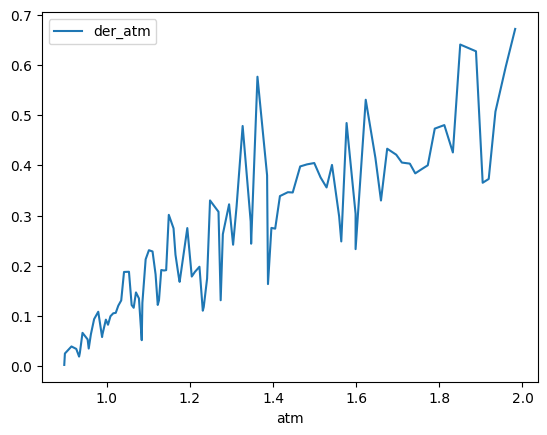

In [127]:
deb1000_dt[deb1000_dt.file_name=='4ddd27e1-cb9e-4469-8d48-5c97c84faf3d'].set_index('atm')[['der_atm']].plot()

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


class LogPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("График давления и производной")

        # Кнопка выбора файла
        self.btn_open = tk.Button(root, text="Открыть файл", command=self.load_file)
        self.btn_open.pack()

        # Создаем область для графика
        self.fig, self.ax = plt.subplots(figsize=(6, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()

    def load_file(self):
        """Открывает диалог выбора файла и загружает данные"""
        file_path = filedialog.askopenfilename(filetypes=[("All files", "*.*")])
        if not file_path:
            return

        # Читаем данные из файла
        data = np.loadtxt(file_path)
        time = data[:, 0]  # Время (часы)
        pressure = data[:, 1]  # Давление (атм)
        derivative = data[:, 2]  # Производная давления (атм)

        # Очищаем старый график
        self.ax.clear()

        # Строим точки
        self.ax.loglog(time, pressure, 'o', label='Давление')
        self.ax.loglog(time, derivative, 's', label='Производная давления')

        # Устанавливаем одинаковую цену делений осей X и Y
        self.ax.set_aspect('equal')

        # Подписи
        self.ax.set_xlabel("Время (часы)")
        self.ax.set_ylabel("Давление и производная (атм)")
        self.ax.set_title("График давления и производной во времени")
        self.ax.legend()
        self.ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Обновляем холст
        self.canvas.draw()





KeyboardInterrupt: 

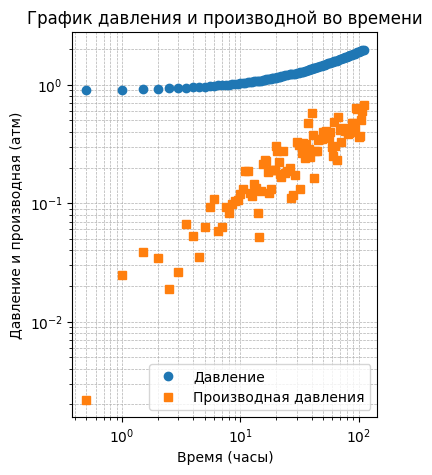

In [131]:
# Создаем главное окно
root = tk.Tk()
app = LogPlotApp(root)
root.mainloop()

# prepare targets and data

In [25]:
import pickle

def save_scaler(scaler, file_path):
    """
    Save an sklearn scaler to a pickle file.

    Args:
        scaler: The scaler object (e.g., StandardScaler, MinMaxScaler).
        file_path (str): Path to save the scaler.

    Returns:
        None
    """
    try:
        with open(file_path, 'wb') as file:
            pickle.dump(scaler, file)
        print(f"Scaler saved successfully to {file_path}")
    except Exception as e:
        print(f"Error saving scaler: {e}")
        
def load_scaler(file_path):
    """
    Load an sklearn scaler from a pickle file.

    Args:
        file_path (str): Path to the scaler file.

    Returns:
        scaler: The loaded scaler object.
    """
    try:
        with open(file_path, 'rb') as file:
            scaler = pickle.load(file)
        print(f"Scaler loaded successfully from {file_path}")
        return scaler
    except Exception as e:
        print(f"Error loading scaler: {e}")
        return None

In [26]:
columns_b=['Некачественное ГДИС',
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом', ]
columns_r=['Влияние ствола скважины_details',
       'Радиальный режим_details', 'Линейный режим_details',
       'Билинейный режим_details', 'Сферический режим_details',
       'Граница постоянного давления_details',
       'Граница непроницаемый разлом_details']

## prepare data

In [ ]:
train = pd.read_parquet()

In [212]:
train.atm.quantile(0.99)

np.float64(613244.5416069893)

In [218]:
np.log1p(1e30)

np.float64(69.07755278982137)

In [2]:
train = pd.read_parquet('E:/DS/data/siam/bi/train_meas_adv.parquet')
test = pd.read_parquet('E:/DS/data/siam/bi/test_meas_adv.parquet')
df = pd.read_csv('E:/DS/data/siam/bi/markup_train.csv')

In [5]:
train['time']=train['time'].abs()

In [9]:
df[df.columns[11:]].describe()

,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,35558.000000,25855.000000,12211.000000,12086.000000,5764.000000,4874.000000,4265.000000
mean,1.719234,1.140486,0.605509,0.934330,1.292040,144.019966,160.928583
std,1.537100,1.155191,1.012616,1.166539,0.982978,782.593841,339.370082
min,-3.843521,-3.707246,-4.109357,-3.332898,-5.164659,0.006653,0.010753
25%,0.914535,0.504870,0.028459,0.327374,0.743594,18.335495,29.301152
50%,1.589366,0.959171,0.516372,0.720093,1.296814,55.182021,75.822331
75%,2.256645,1.422883,1.024682,1.130444,1.808614,134.488126,182.395620
max,31.777765,6.408605,29.027806,29.129381,6.631359,51035.492870,11595.502940


In [10]:
40000/300

133.33333333333334

In [249]:
8050668  /len(train)

0.952692054769686

In [8]:
train[(train['time']<1e4)&(train['atm']<1e5)&(train['der_atm']<1e5)].shape

(8044074, 11)

In [9]:
train.describe()

,time,atm,der_atm,smoothed_pressure_ma,smoothed_pressure_gaussian,smoothed_pressure_sg,smoothed_pressure_lowess,derivative_fd,derivative_sd,derivative_cd_log
count,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06
mean,1.047748e+02,1.098560e+26,1.538404e+25,1.108552e+26,1.098560e+26,1.099158e+26,1.112726e+26,9.180014e+25,9.033633e+25,5.862119e+26
std,1.808394e+03,1.807096e+28,3.163218e+27,1.820474e+28,1.806788e+28,1.807766e+28,1.817742e+28,6.154411e+28,5.907448e+28,2.207627e+29
min,0.000000e+00,2.564978e-07,5.039755e-13,0.000000e+00,0.000000e+00,-3.263002e+05,-1.384848e+05,-2.375855e+07,-4.585329e+28,-1.532981e+09
25%,9.083333e-01,1.212583e+01,2.378922e+00,1.264083e+01,1.217117e+01,1.216526e+01,1.214141e+01,1.110449e-01,1.308368e-01,3.360795e+00
50%,7.300000e+00,3.823615e+01,7.674474e+00,3.913066e+01,3.825940e+01,3.827316e+01,3.822085e+01,9.278012e-01,1.037269e+00,5.198170e+01
75%,4.397611e+01,1.126225e+02,2.418928e+01,1.142728e+02,1.126223e+02,1.125673e+02,1.125531e+02,1.254890e+01,1.422721e+01,5.995013e+02
max,8.429354e+05,4.647122e+30,1.324309e+30,4.595379e+30,4.616909e+30,4.647281e+30,4.667284e+30,6.696182e+31,6.355187e+31,1.645891e+32


In [11]:
train.columns[1:]

Index(['time', 'atm', 'der_atm', 'smoothed_pressure_ma',
       'smoothed_pressure_gaussian', 'smoothed_pressure_sg',
       'smoothed_pressure_lowess', 'derivative_fd', 'derivative_sd',
       'derivative_cd_log'],
      dtype='object')

In [12]:
# Define the clip ranges for each column
#clip_min = {'time': 0, 'atm': 0, 'der_atm': 0}  # Minimum values for clipping
#clip_max = {'time': 1e4, 'atm': 1e5, 'der_atm': 1e5}  # Maximum values for clipping

# Clip the values in the specified columns
for col in train.columns[1:]:
    if col !='time':
        #train_log1p[col] = train_log1p[col].clip(lower=clip_min[col], upper=clip_max[col])
        test[col] = test[col].clip(lower=0, upper=1e5)
        train[col] = train[col].clip(lower=0, upper=1e5)
    else:
        test[col] = test[col].clip(lower=0, upper=1e4)
        train[col] = train[col].clip(lower=0, upper=1e4)        

In [13]:
r_scaler = RobustScaler()
#scaler.fit_transform(ch2)
qt = QuantileTransformer(output_distribution='uniform')

In [14]:
r_scaler.fit(train[train.columns[1:]])

RobustScaler()

In [15]:
train[train.columns[1:]] = r_scaler.transform(train[train.columns[1:]])

In [16]:
test[train.columns[1:]] = r_scaler.transform(test[train.columns[1:]])

In [18]:
train.describe()

,time,atm,der_atm,smoothed_pressure_ma,smoothed_pressure_gaussian,smoothed_pressure_sg,smoothed_pressure_lowess,derivative_fd,derivative_sd,derivative_cd_log
count,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06
mean,1.721877e+00,6.770044e+01,1.244316e+02,6.737030e+01,6.775883e+01,6.779647e+01,6.789336e+01,1.904960e+02,1.683188e+02,9.628591e+00
std,1.049823e+01,2.313979e+02,5.994187e+02,2.295928e+02,2.315186e+02,2.316526e+02,2.317751e+02,1.088693e+03,9.656803e+02,3.449687e+01
min,-1.695003e-01,-3.804719e-01,-3.518729e-01,-3.850231e-01,-3.808756e-01,-3.811991e-01,-3.806414e-01,-7.459496e-02,-7.358406e-02,-8.719705e-02
25%,-1.484095e-01,-2.598128e-01,-2.427999e-01,-2.606446e-01,-2.597106e-01,-2.600336e-01,-2.597252e-01,-6.566698e-02,-6.430246e-02,-8.155946e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.515905e-01,7.401872e-01,7.572001e-01,7.393554e-01,7.402894e-01,7.399664e-01,7.402748e-01,9.343330e-01,9.356975e-01,9.184405e-01
max,2.320227e+02,9.946776e+02,4.584626e+03,9.835571e+02,9.951279e+02,9.956146e+02,9.955193e+02,8.039898e+03,7.093948e+03,1.676585e+02


In [21]:
save_scaler(r_scaler, 'E:/DS/data/siam/scalers/dt_r_scaler_adv.pkl')

Scaler saved successfully to E:/DS/data/siam/scalers/dt_r_scaler_adv.pkl


In [22]:
train.to_parquet('E:/DS/data/siam/bi/train_trans/train_r_sc_adv.parquet',index=False)
test.to_parquet('E:/DS/data/siam/bi/test_trans/test_r_sc_adv.parquet',index=False)

In [34]:
len(train.columns[1:])

10

## log

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_parquet('E:/DS/data/siam/bi/train_meas.parquet')
test = pd.read_parquet('E:/DS/data/siam/bi/test_meas.parquet')
df = pd.read_csv('E:/DS/data/siam/bi/markup_train.csv')

In [ ]:
test = pd.read_parquet('E:/DS/data/siam/bi/test_meas.parquet')

In [4]:
train.file_name.value_counts().describe()

count    44884.000000
mean       188.272903
std        155.981269
min          1.000000
25%         85.000000
50%        165.000000
75%        267.000000
max       3378.000000
Name: count, dtype: float64

In [6]:
train.file_name.value_counts().quantile(.995)

np.float64(1018.0)

In [17]:
train = pd.read_parquet('E:/DS/data/siam/bi/train_meas_adv.parquet')
test = pd.read_parquet('E:/DS/data/siam/bi/test_meas_adv.parquet')
df = pd.read_csv('E:/DS/data/siam/bi/markup_train.csv')

In [19]:
test[test.columns[1:]] = np.log1p(test[test.columns[1:]].abs())

In [20]:
test[test.columns[1:]].describe()

,time,atm,der_atm,smoothed_pressure_ma,smoothed_pressure_gaussian,smoothed_pressure_sg,smoothed_pressure_lowess,derivative_fd,derivative_sd,derivative_cd_log
count,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000,79042.000000
mean,2.683015,3.845251,2.420927,3.879162,3.849766,3.849515,3.846976,1.433865,1.495632,4.377358
std,1.946687,2.445542,2.147106,2.433771,2.442078,2.443821,2.445801,2.308502,2.345013,3.157005
min,0.000011,0.000323,0.000086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.901512,2.469248,1.084640,2.525057,2.475417,2.478528,2.470873,0.057972,0.066747,1.807496
50%,2.545337,3.599412,1.969856,3.623569,3.599598,3.602331,3.599040,0.386052,0.430766,4.182771
75%,4.179587,4.474238,2.943324,4.493231,4.473854,4.475280,4.474449,1.912925,2.013287,6.451389
max,9.189831,14.585720,13.904659,14.585620,14.585572,14.585524,14.585565,16.827082,16.480124,18.000144


In [21]:
train[test.columns[1:]]= np.log1p(train[test.columns[1:]].abs())

In [22]:
train.describe()

,time,atm,der_atm,smoothed_pressure_ma,smoothed_pressure_gaussian,smoothed_pressure_sg,smoothed_pressure_lowess,derivative_fd,derivative_sd,derivative_cd_log
count,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06,8.450291e+06
mean,2.379745e+00,4.190906e+00,2.772520e+00,4.220241e+00,4.194525e+00,4.194424e+00,4.193495e+00,1.929824e+00,1.967112e+00,4.482468e+00
std,1.878451e+00,2.828724e+00,2.561968e+00,2.819550e+00,2.826424e+00,2.827424e+00,2.828618e+00,2.761760e+00,2.762439e+00,3.460797e+00
min,0.000000e+00,2.564978e-07,5.039755e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.462303e-01,2.574582e+00,1.217557e+00,2.613068e+00,2.578030e+00,2.579095e+00,2.576258e+00,1.224544e-01,1.371974e-01,1.716131e+00
50%,2.116256e+00,3.669598e+00,2.160385e+00,3.692141e+00,3.670191e+00,3.671339e+00,3.669525e+00,7.051324e-01,7.515534e-01,4.109069e+00
75%,3.806131e+00,4.732881e+00,3.226418e+00,4.747302e+00,4.732880e+00,4.733289e+00,4.732625e+00,2.692122e+00,2.778645e+00,6.495189e+00
max,1.364465e+01,7.061380e+01,6.935844e+01,7.060260e+01,7.060728e+01,7.061384e+01,7.061813e+01,7.328168e+01,7.322941e+01,7.418101e+01


In [23]:
train.to_parquet('E:/DS/data/siam/bi/train_trans/train_l1p_adv.parquet',index=False)
test.to_parquet('E:/DS/data/siam/bi/test_trans/test_l1p_adv.parquet',index=False)

In [23]:
train.to_parquet('E:/DS/data/siam/bi/train_trans/train_l1p.parquet',index=False)
test.to_parquet('E:/DS/data/siam/bi/test_trans/test_l1p.parquet',index=False)

In [16]:
np.log1p(test.time.quantile(.05))

np.float64(0.0805555555270984)

In [30]:
df[columns_r] = np.log1p(df[columns_r])

C:\Users\vorsi\miniconda3\envs\and_kar_c\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [32]:
df.to_csv('E:/DS/data/siam/bi/tgs/tgl1p.csv', index=False)

## prepare targets

In [29]:
np.log1p(df[columns_r]).describe()

C:\Users\vorsi\miniconda3\envs\and_kar_c\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,34733.000000,25623.000000,11902.000000,11975.000000,5702.000000,4874.000000,4265.000000
mean,0.879336,0.638511,0.337044,0.525697,0.741806,3.918767,4.226272
std,0.623070,0.561310,0.654828,0.569006,0.531168,1.482659,1.418370
min,-6.275911,-7.154189,-8.279394,-5.312955,-6.117826,0.006631,0.010696
25%,0.680633,0.418730,0.069660,0.294581,0.568902,2.961942,3.411186
50%,0.962543,0.675743,0.430483,0.546905,0.836085,4.028597,4.341495
75%,1.186259,0.887411,0.712975,0.758172,1.034593,4.908884,5.211646
max,3.489750,2.002642,3.402124,3.405501,2.032266,10.840296,9.358459


In [279]:
df[columns_r]=df[columns_r].abs()

In [327]:
df[columns_r].describe()

,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,35558.000000,25855.000000,12211.000000,12086.000000,5764.000000,4874.000000,4265.000000
mean,1.719234,1.140486,0.605509,0.934330,1.292040,144.019966,160.928583
std,1.537100,1.155191,1.012616,1.166539,0.982978,782.593841,339.370082
min,-3.843521,-3.707246,-4.109357,-3.332898,-5.164659,0.006653,0.010753
25%,0.914535,0.504870,0.028459,0.327374,0.743594,18.335495,29.301152
50%,1.589366,0.959171,0.516372,0.720093,1.296814,55.182021,75.822331
75%,2.256645,1.422883,1.024682,1.130444,1.808614,134.488126,182.395620
max,31.777765,6.408605,29.027806,29.129381,6.631359,51035.492870,11595.502940


In [302]:
excl_outliers = df[(df[columns_r[-1]]>500)|(df[columns_r[-2]]>1000)|(df[columns_r[0]]>9)|(df[columns_r[2]]>9)|(df[columns_r[3]]>9)].file_name

In [328]:
df_woo= df[~df.file_name.isin(excl_outliers)].copy()

In [ ]:
df_woo

In [304]:
df[~df.file_name.isin(excl_outliers)].describe()

,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
count,44812.000000,44812.000000,44812.000000,44812.000000,44812.000000,44812.000000,44812.000000,44812.000000,35263.000000,25649.000000,12109.000000,12011.000000,5722.000000,4806.000000,4004.000000
mean,0.161876,0.786910,0.572369,0.270218,0.268031,0.127689,0.107248,0.089351,1.847326,1.223283,0.821359,1.027234,1.377027,109.293351,108.480665
std,0.368341,0.409495,0.494741,0.444077,0.442939,0.333747,0.309432,0.285253,1.377135,1.069917,0.809470,1.056607,0.859200,151.717198,111.464805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000171,0.000001,0.000225,0.000111,0.006653,0.010753
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998249,0.562496,0.289017,0.410794,0.790027,17.993814,26.419737
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.612310,0.973591,0.624668,0.749050,1.308547,54.053207,68.933121
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.266933,1.430750,1.082633,1.143668,1.814359,128.577304,152.359289
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.624629,6.408605,6.073916,6.179779,6.631359,989.005304,497.627579


In [329]:
df_woo.to_csv('E:/DS/data/siam/bi/tgs/wo_outliers.csv', index=False)

In [333]:
df_woo_r_sc = df_woo.copy()

In [363]:
df_woo_r_sc_tt = df_woo_r_sc[columns_r].copy()

In [313]:
df_woo_r_sc_tt.isna().sum()/len(df_woo_r_sc_tt)

Влияние ствола скважины_details         0.213090
Радиальный режим_details                0.427631
Линейный режим_details                  0.729782
Билинейный режим_details                0.731969
Сферический режим_details               0.872311
Граница постоянного давления_details    0.892752
Граница непроницаемый разлом_details    0.910649
dtype: float64

In [364]:
for i, col in enumerate(columns_r):
    print(col)
    r_scaler = RobustScaler()
    
    data = df_woo_r_sc_tt[[col]].dropna()
    #print(col, data.shape)
    data = r_scaler.fit_transform(data)
    #print(col, data.shape)
    save_scaler(r_scaler, f'E:/DS/data/siam/scalers/tg_scalers_r/tg_r_{i}.pkl')
    df_woo_r_sc_tt.loc[~df_woo_r_sc_tt[col].isna(), col] = data.reshape(-1).tolist()

Влияние ствола скважины_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_0.pkl
Радиальный режим_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_1.pkl
Линейный режим_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_2.pkl
Билинейный режим_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_3.pkl
Сферический режим_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_4.pkl
Граница постоянного давления_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_5.pkl
Граница непроницаемый разлом_details
Scaler saved successfully to E:/DS/data/siam/scalers/tg_scalers_r/tg_r_6.pkl


In [370]:
df_woo_r_sc[columns_r] = df_woo_r_sc_tt

In [325]:
data

,Граница непроницаемый разлом_details
15,12.630677
27,82.014926
33,43.679635
37,91.372629
42,31.581957
...,...
44978,33.035776
44979,262.487481
44982,378.608283
45023,26.931066


In [366]:
train_r_sc.to_parquet('E:/DS/data/siam/bi/train_trans/train_r_sc.parquet',index=False)

In [36]:
train_r_sc.to_parquet('E:/DS/data/siam/bi/train_trans/train_r_sc.parquet',index=False)
test_r_sc.to_parquet('E:/DS/data/siam/bi/test_trans/test_r_sc.parquet',index=False)

In [372]:
df_woo_r_sc[df_woo_r_sc.file_name.isin(train_r_sc.file_name.unique())].to_csv('E:/DS/data/siam/bi/tgs/wo_outliers_transform_rs_filt.csv', index=False)

In [374]:
df_woo_r_sc.to_csv('E:/DS/data/siam/bi/tgs/wo_outliers_transform_rs.csv', index=False)

In [23]:
df_woo_r_sc  = pd.read_csv('E:/DS/data/siam/bi/tgs/wo_outliers_transform_rs.csv')

In [24]:
df_woo_r_sc.shape

(44812, 18)

In [25]:
df_woo_r_sc_f = df_woo_r_sc[df_woo_r_sc.file_name.isin(train.file_name.unique())].copy()

In [27]:
val_df_woo_r_sc_f = df_woo_r_sc_f.sample(5000)

In [28]:
train_df_woo_r_sc_f = df_woo_r_sc_f[~df_woo_r_sc_f.file_name.isin(val_df_woo_r_sc_f.file_name.unique())]

In [29]:
train_df_woo_r_sc_f.shape

(39480, 18)

In [30]:
train_df_woo_r_sc_f.to_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f_adv.csv', index=False)

In [31]:
val_df_woo_r_sc_f.to_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f_adv.csv', index=False)

In [32]:
val_df_woo_r_sc_f.sample(1000).to_csv('E:/DS/data/siam/bi/tgs/deb1k_df_woo_r_sc_f_adv.csv', index=False)

## tgs for Plots

In [1]:
import os

def get_png_files(folder_path):
    """
    Get all .png files from the specified folder.

    :param folder_path: Path to the folder containing the PNG files
    :return: List of filenames with .png extension
    """
    png_files = []
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith('.png'):
                png_files.append(filename[:-4])
    else:
        print(f"The folder {folder_path} does not exist or is not a directory.")
    return png_files

# Example usage:
# folder_path = 'path/to/your/folder'
# png_list = get_png_files(folder_path)
# print(png_list)

In [9]:
tr_l =get_png_files('E:/DS/data/siam/plots/train/')

In [10]:
v_l =get_png_files('E:/DS/data/siam/plots/val/')

In [6]:
tr_l

['000092d4-c259-42b7-9d79-f0332283a7d9',
 '0000c508-9d7b-4bc0-8a01-43946ac0a20a',
 '00030ff5-1ea1-4afb-838c-04ec166fd4f2',
 '0003ec4d-f9dd-4163-ab0d-b92b581392d6',
 '0003f7e3-929b-4b90-98e1-6f462c468250',
 '0004fa9a-fb79-4951-97c7-6bf2c341dcec',
 '0009915f-b960-4dcd-9d31-1fef18e7e01a',
 '0009f21a-d968-418f-b83a-eba972279e06',
 '000b4453-7a8d-41c3-bdc6-8e62a4923bc8',
 '000fd05a-14ce-409a-bb0e-b9158296abb2',
 '0010361d-1384-4c00-814e-b07404399f02',
 '0012ac16-a52e-47df-8cf4-94906cea9058',
 '0014d3ba-5590-43e8-9494-09da99e74fcf',
 '0015b93b-3d80-4322-9598-874740e4c5e9',
 '00167cae-f28a-49a9-a2af-0f75eee185e2',
 '0017dab0-f2b7-4917-b221-6676861aa148',
 '0017dbc7-05de-4dab-8bfc-37a297aec832',
 '0017eab1-b5e6-4319-b4d3-38269682937c',
 '0018011f-31a3-4956-a2da-dbcdaf4d0cc6',
 '001816b8-209f-4953-993a-1170541395be',
 '00195bf0-ab2b-4672-8e10-76b269b01243',
 '0019cf56-1c9f-4269-b27d-ebf77d17ab39',
 '001a9a7c-3487-4a0f-9ac1-7aeaf7df2982',
 '001b7884-b1ad-4521-99a2-d966c992acb8',
 '001c9920-3b8a-

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('E:/DS/data/siam/bi/tgs/tgl1p.csv')

In [47]:
df_woo_r_sc  = pd.read_csv('E:/DS/data/siam/bi/tgs/wo_outliers_transform_rs.csv')

In [48]:
df_woo_r_sc[df_woo_r_sc.file_name.isin(v_l)].to_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f_CV_3.csv', index=False)

In [36]:
df_woo_r_sc[df_woo_r_sc.file_name.isin(tr_l)].shape

(40418, 18)

In [37]:
df_woo_r_sc[df_woo_r_sc.file_name.isin(tr_l)].file_name.nunique()

40418

In [49]:
df_woo_r_sc[df_woo_r_sc.file_name.isin(tr_l)].to_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f_CV_3.csv', index=False)

In [13]:
df[df.file_name.isin(v_l)].to_csv('E:/DS/data/siam/bi/tgs/val_df_l1p_CV_6.csv', index=False)

In [14]:
df[df.file_name.isin(tr_l)].to_csv('E:/DS/data/siam/bi/tgs/train_df_l1p_CV_6.csv', index=False)

In [15]:
df[df.file_name.isin(tr_l)].shape

(40671, 18)

# new tgs mix

In [20]:
tr = pd.read_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f.csv')
tr_adv = pd.read_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f_adv.csv')
v =pd.read_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f.csv') 
v_adv =pd.read_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f_adv.csv')

In [21]:
df = pd.concat([tr,v], ignore_index=True)

In [22]:
new_v = df.sample(4000)

In [24]:
new_v.to_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f_2.csv', index=False)

In [25]:
df[~df.file_name.isin(new_v.file_name)].to_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f_2.csv', index=False)

In [26]:
df = pd.concat([tr_adv,v_adv], ignore_index=True)

In [27]:
new_v = df.sample(4000)

In [28]:
new_v.to_csv('E:/DS/data/siam/bi/tgs/val_df_woo_r_sc_f_adv_2.csv', index=False)

In [29]:
df[~df.file_name.isin(new_v.file_name)].to_csv('E:/DS/data/siam/bi/tgs/train_df_woo_r_sc_f_adv_2.csv', index=False)

## with l1p

In [24]:
train = pd.read_parquet('E:/DS/data/siam/bi/train_trans/train_l1p.parquet')

In [25]:
train_adv = pd.read_parquet('E:/DS/data/siam/bi/train_trans/train_l1p_adv.parquet')

In [32]:
df = pd.read_csv('E:/DS/data/siam/bi/tgs/tgl1p.csv')

In [27]:
df = df[df.file_name.isin(train.file_name.unique())]

In [33]:
df = df[df.file_name.isin(train_adv.file_name.unique())]

In [34]:
new_v = df.sample(4000)

In [35]:
new_v.to_csv('E:/DS/data/siam/bi/tgs/val_df_l1p_adv_1.csv', index=False)

In [36]:
df[~df.file_name.isin(new_v.file_name)].shape

(40809, 18)

In [37]:
df[~df.file_name.isin(new_v.file_name)].to_csv('E:/DS/data/siam/bi/tgs/train_df_l1p_adv_1.csv', index=False)

## Siam 2

In [59]:
df2 = pd.read_csv("E:/DS/data/siam/siam_seq/markup.csv", sep=';')

In [60]:
df2

,file,mark,recovery,drop
0,00e03657-8e1e-4c8c-a724-1d3c77b48510,"[0.0,235.9225,237.06666666666666,2076.06055555...","[[2419.9805555555554,2437.4241666666667],[3177...","[[3453.6875,3763.9605555555554]]"
1,00e4dba2-36d2-42b4-beb1-c55aed75f506,"[0.0,7979.234444444444,13284.465,19439.8005555...",[],"[[13284.465,19439.800555555557]]"
2,00f035b7-ad7a-4f30-9081-522a3c10805b,"[0.0,42.75,2438.3330555555553]",[],"[[0.0,42.75]]"
3,01a0c034-6afc-4e73-95fa-621f702a0b7d,"[0.0,491.98305555555555,1439.9830555555557,154...",[],"[[0.0,491.98305555555555]]"
4,01a530d3-6496-4515-9fbb-4f44e298fd29,"[0.0,1287.0341666666666,1288.0483333333334,156...",[],"[[4920.376666666667,6208.231666666667]]"
...,...,...,...,...
95,1dfaf03c-e297-4d92-a0bf-40b1a829391f,"[0.0,7.4,7.933055555555556,14.466666666666667,...",[],[]
96,1e149fbd-41c6-4779-b87d-c5dc17fbb4c0,"[0.0,635.3127777777778]",[],"[[0.0,635.3127777777778]]"
97,1e19b77c-8a0e-4749-a384-9c1e679035bf,"[0.0,82.16555555555556,216.66027777777776,229....",[],[]
98,1e4b4c18-1e32-45eb-917a-5760e33fbaca,"[0.0,1217.8258333333333,1223.6030555555556,125...","[[9541.77638888889,10288.5075]]","[[10339.343055555555,10739.613055555556],[1311..."


In [62]:
df2.recovery.values

array(['[[2419.9805555555554,2437.4241666666667],[3177.7994444444444,3453.6875],[3763.9605555555554,3770.1033333333335]]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[[10045.820833333333,10165.977777777778]]', '[]', '[]',
       '[[1172.6930555555555,1173.3916666666667],[1268.9944444444445,1439.7258333333334]]',
       '[]', '[[2328.0,3456.0]]', '[[2304.0,2952.0]]', '[]', '[]', '[]',
       '[]', '[[2247.9280555555556,2339.244166666667]]',
       '[[497.48305555555555,671.8]]', '[]', '[]', '[[2328.0,3456.0]]',
       '[[234.14305555555555,1341.3944444444444]]', '[]', '[]', '[]',
       '[]',
       '[[16.816666666666666,28.825],[28.825,53.033055555555556],[53.033055555555556,108.49166666666666]]',
       '[]', '[[2342.0630555555554,3018.7725]]', '[]', '[]', '[]', '[]',
       '[[2297.1630555555557,2397.9513888888887],[2590.0852777777777,2707.956388888889]]',
       '[[697.3194444444445,1942.815],[11643.93638888889,12196.375]]',
       '[]', '[]', '[]', '[]', '